<a href="https://colab.research.google.com/github/nacczevedo/pos_datascience_analytics/blob/main/MVP_Sprint1_PUC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PUC-Rio**
## Pós Graduação em Ciências de Dados e Anaytics
## Sprint: Análise de Dados e Boas Práticas
## Nathalia Azevedo





###**1 - Definição do problema**

O dataset utilizado neste trabalho será o **Netflix IMDB Scores** encontrado no [Kaggle](https://www.kaggle.com/datasets/thedevastator/netflix-imdb-scores/), e retirado pelo kaggle originalmente do [Back 2 Viz Basics.](https://www.kaggle.com/datasets/thedevastator/netflix-imdb-scores/).

Este banco de dados de séries e filmes fornece informações abrangentes sobre vários títulos disponíveis na Netflix. O conjunto de dados inclui detalhes como o nome do título, seu tipo, uma breve descrição do conteúdo, o ano em que foi lançado, classificação de certificação de idade, tempo de execução, pontuação no IMDb e votos no IMDb.

Ao analisar esse conjunto de dados, podemos obter insights sobre a distribuição das pontuações e classificações do IMDb para programas de TV e filmes disponíveis na Netflix. Essas informações podem nos ajudar a entender a popularidade e a recepção de títulos com base nas classificações dos usuários, assim como, recomendar novos filmes e séries, de forma mais acertiva novos filmes com base nessas classificações.

O conjunto de dados foi cuidadosamente selecionado para garantir precisão e relevância pela fonte. **Ele exclui quaisquer valores nulos nas pontuações do IMDb para manter a integridade dos dados.** Cada entrada também contém um ID que corresponde ao JustWatch (uma plataforma para streaming legal), bem como o respectivo ID de título no IMDb.

---

**Atributos do dado:**

1.   Title: o nome do programa de TV ou filme.
2.   Type: a coluna de tipo categoriza cada entrada como um programa de TV ou um filme.
3.   Description: a coluna de descrição fornece um resumo do enredo ou enredo de cada programa de TV ou filme.
4.   Release_year: indica o ano de lançamento de cada título em formato numérico.
5. Age_certification: esta coluna especifica as classificações etárias atribuídas a cada título, indicando se elas são adequadas para o público em geral (por exemplo, todas as idades) ou restritas devido ao conteúdo adulto (por exemplo, classificação R).
6. Runtime: fornece a duração dos episódios de programas de TV ou a duração dos filmes em formato numérico.
7. Imdb_score: pontuação do IMDB atribuída a cada título, representando sua qualidade geral e popularidade no IMDB.
8. Imdb_votes: O número de votos recebidos por cada título no IMDB.

In [1]:
# Importando as bibliotecas necessárias

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # para tratamento de missings
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

###**2 - Carga dos dados**

In [2]:
# importando os dados que estão presentes no github através de url

url = 'https://raw.githubusercontent.com/nacczevedo/pos_datascience_analytics/1e7387a8be3cf7da8d440ff5b29412f9de7e5dc8/Netflix%20TV%20Shows%20and%20Movies.csv'
labels_atributos = ['ID', 'TÍTULO', 'TIPO','SINOPSE','ANO','CLASSIFICAÇÃO', 'DURAÇÃO', 'ID IMDB','NOTA IMDB', 'QUANTIDADE DE VOTOS']
dataset = pd.read_csv(url, delimiter=',', index_col=0,header=0,names=labels_atributos)

In [3]:
dataset.head()

,ID,TÍTULO,TIPO,SINOPSE,ANO,CLASSIFICAÇÃO,DURAÇÃO,ID IMDB,NOTA IMDB,QUANTIDADE DE VOTOS
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0


### **3 - Análise Exploratória dos Dados**

#### **3.1 - Estatísticas**

Com esta análise temos o objetivo de conhecer melhor o nosso dado, conhecendo seus atributos, verificação de algumas linhas do dataset, perceber se há valores faltantes, discrepantes ou inconsistentes. E por fim um resumo estatístisca dos atributos numéricos para sabermos métricas como mínimo, máximo, mediana, moda, média, desvio-padrão e número de valores ausentes.

Agora veremos as dimensões do nosso banco de dados

In [4]:
print(dataset.shape)

(5283, 10)


Podemos ver que temos 5283 títulos no nosso banco de dados com 10 características(atributos) distintas.


Veremos agora as informações do tipo de dado para cada tributo do dataset.

In [46]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5283 entries, 0 to 5282
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5283 non-null   object 
 1   TÍTULO               5283 non-null   object 
 2   TIPO                 5283 non-null   object 
 3   SINOPSE              5278 non-null   object 
 4   ANO                  5283 non-null   int64  
 5   CLASSIFICAÇÃO        2998 non-null   object 
 6   DURAÇÃO              5283 non-null   int64  
 7   ID IMDB              5283 non-null   object 
 8   NOTA IMDB            5283 non-null   float64
 9   QUANTIDADE DE VOTOS  5267 non-null   float64
dtypes: float64(2), int64(2), object(6)
memory usage: 454.0+ KB


### **Resumo estatístico**

In [47]:
dataset.describe()

,ANO,DURAÇÃO,NOTA IMDB,QUANTIDADE DE VOTOS
count,5283.000000,5283.000000,5283.000000,5.267000e+03
mean,2015.879992,79.199886,6.533447,2.340719e+04
std,7.346098,38.915974,1.160932,8.713432e+04
min,1953.000000,0.000000,1.500000,5.000000e+00
25%,2015.000000,45.000000,5.800000,5.210000e+02
50%,2018.000000,87.000000,6.600000,2.279000e+03
75%,2020.000000,106.000000,7.400000,1.014400e+04
max,2022.000000,235.000000,9.600000,2.268288e+06


Nele já podemos verificar os valores mínimo e máximo de cada atributo numérico. Logo é possível notar que o título mais antigo é de 1953 e o mais novo de 2022, porém a maior concentração de lançamentos está em 2018.
Também podemos perceber que não temos nenhum título com nota máxima 10, sendo a maior nota de 9,6 e a menor de 1,5, porém com uma média de 6,5.

Também podemos ver os últimos 10 títulos.

In [48]:
dataset.tail(10)

,ID,TÍTULO,TIPO,SINOPSE,ANO,CLASSIFICAÇÃO,DURAÇÃO,ID IMDB,NOTA IMDB,QUANTIDADE DE VOTOS
5273,tm1097142,My Bride,MOVIE,The story follows a young man and woman who go...,2021,NaN,93,tt14216488,4.9,281.0
5274,tm878575,The Heartbreak Club,MOVIE,"Coping with heartbreak, the shy owner of floun...",2021,NaN,101,tt11841144,6.2,188.0
5275,ts286386,The Big Day,SHOW,"For six engaged couples, happily ever after be...",2021,TV-MA,45,tt13887518,4.6,327.0
5276,tm985215,Princess 'Daya'Reese,MOVIE,Reese is a con artist from Manila who dreams o...,2021,NaN,115,tt13399802,7.2,45.0
5277,tm1004011,Time to Dance,MOVIE,When a ballroom dancerâ€™s shot at a crucial t...,2021,NaN,107,tt8622232,2.2,950.0
5278,tm1040816,Momshies! Your Soul is Mine,MOVIE,Three women with totally different lives accid...,2021,NaN,108,tt14412240,5.8,26.0
5279,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,tt13857480,6.9,39.0
5280,tm1045018,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,NaN,88,tt14620732,6.5,32.0
5281,tm1098060,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,NaN,116,tt10168094,6.2,9.0
5282,ts271048,Mighty Little Bheem: Kite Festival,SHOW,"With winter behind them, Bheem and his townspe...",2021,NaN,0,tt13711094,8.8,16.0


Agora vamos contar quantos filmes e quantos programas de TV temos.

In [49]:
# Distribuição das classes de tipos de títulos
grouped = dataset.groupby('TIPO').size()

In [50]:
print(grouped)

TIPO
MOVIE    3407
SHOW     1876
dtype: int64


Notamos que cerca de 65% dos títulos que constam na plataforma são filmes.

####**3.2 - Visualizações**

Para visualizar a distribuição dos escores do IMDb de forma efetiva, utilizaremos histogramas. Os histogramas categorizam os dados em compartimentos ou intervalos com base em uma métrica escolhida (neste caso: pontuação IMDb). O comprimento de cada barra dentro de um compartimento representa o número de títulos que se enquadram nesse intervalo específico de pontuações. Com técnicas corretas de binning, podemos observar padrões e tendências em como diferentes séries e filmes são classificados pelos espectadores.


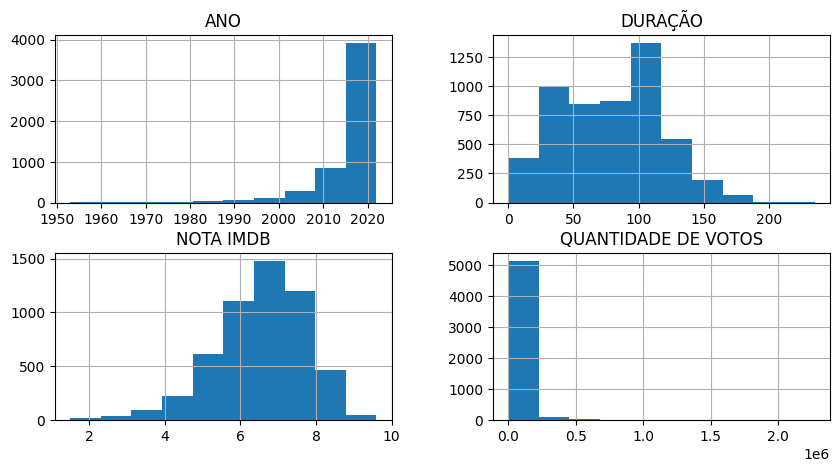

In [51]:
# Histograma
dataset.hist(figsize = (10,5))
plt.show()


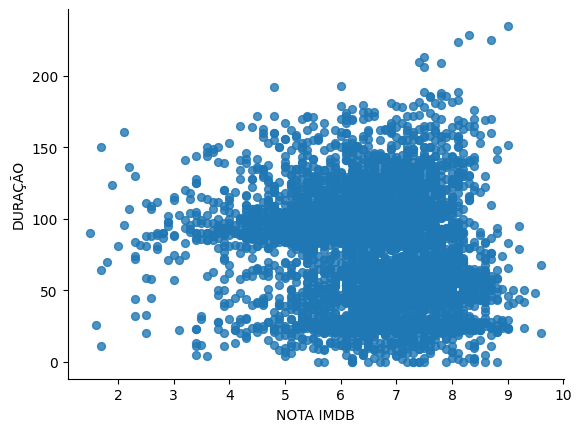

In [53]:
dataset.plot(kind='scatter', x='NOTA IMDB', y='DURAÇÃO', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

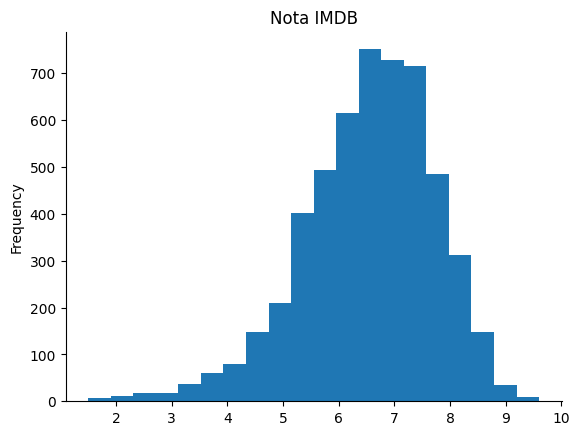

In [55]:
dataset['NOTA IMDB'].plot(kind='hist', bins=20, title='Nota IMDB')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='ANO', ylabel='Count'>

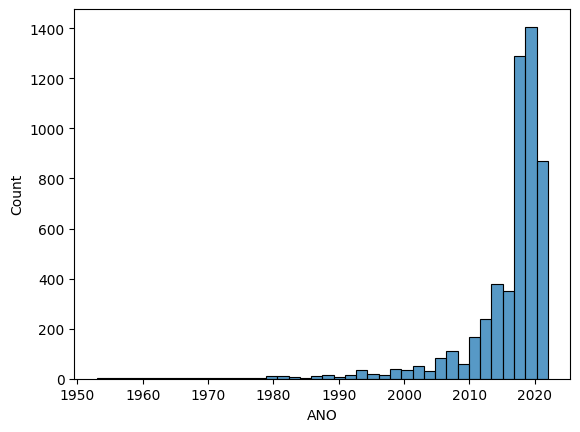

In [70]:
sns.histplot(data = dataset, x='ANO', bins=40)

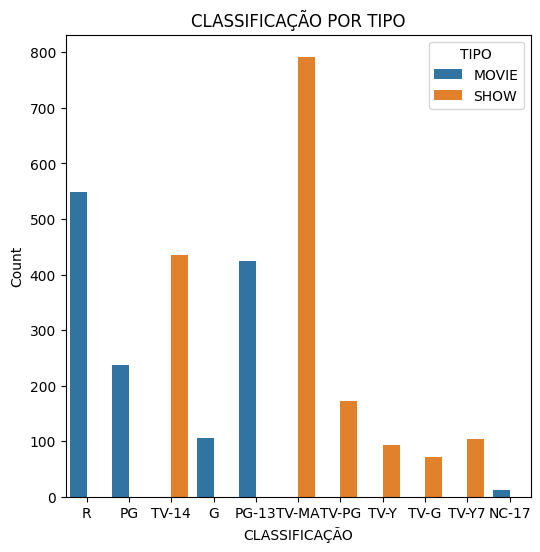

In [57]:
# Age certification distribution by type
plt.figure(figsize=(6, 6))
sns.countplot(x='CLASSIFICAÇÃO', hue='TIPO', data=dataset)
plt.xlabel('CLASSIFICAÇÃO')
plt.ylabel('Count')
plt.title('CLASSIFICAÇÃO POR TIPO')
plt.legend(title='TIPO')
plt.show()

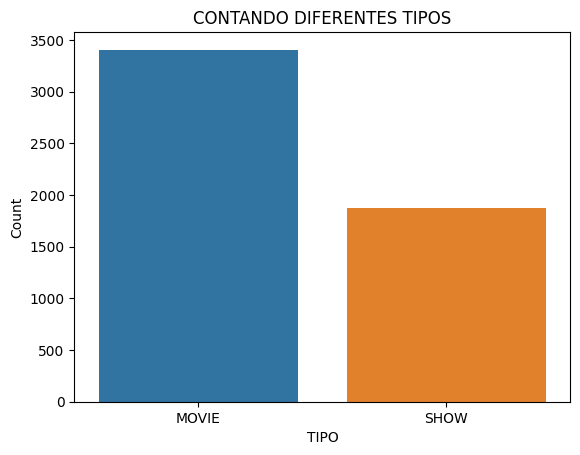

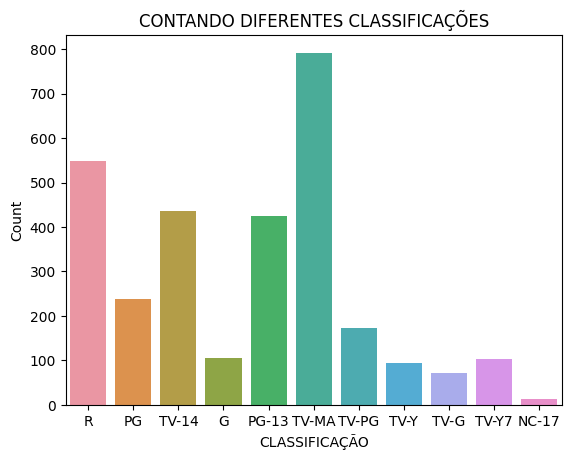

In [58]:
# Count of different types (MOVIE, SHOW, etc.)
sns.countplot(x='TIPO', data=dataset)
plt.xlabel('TIPO')
plt.ylabel('Count')
plt.title('CONTANDO DIFERENTES TIPOS')
plt.show()

# Count of age certifications
sns.countplot(x='CLASSIFICAÇÃO', data=dataset)
plt.xlabel('CLASSIFICAÇÃO')
plt.ylabel('Count')
plt.title('CONTANDO DIFERENTES CLASSIFICAÇÕES')
plt.show()

Agora vamos gerar alguns gráficos de densidade para visualizarmos melhor a distribuição dos atributos. Podemos observar com um density plot que alguns atributos tem uma distribuição distorcida.

Ao percebermos uma variação na distribuição podemos fazer uma transformação para aprocimar de uma distribuição mais normal.

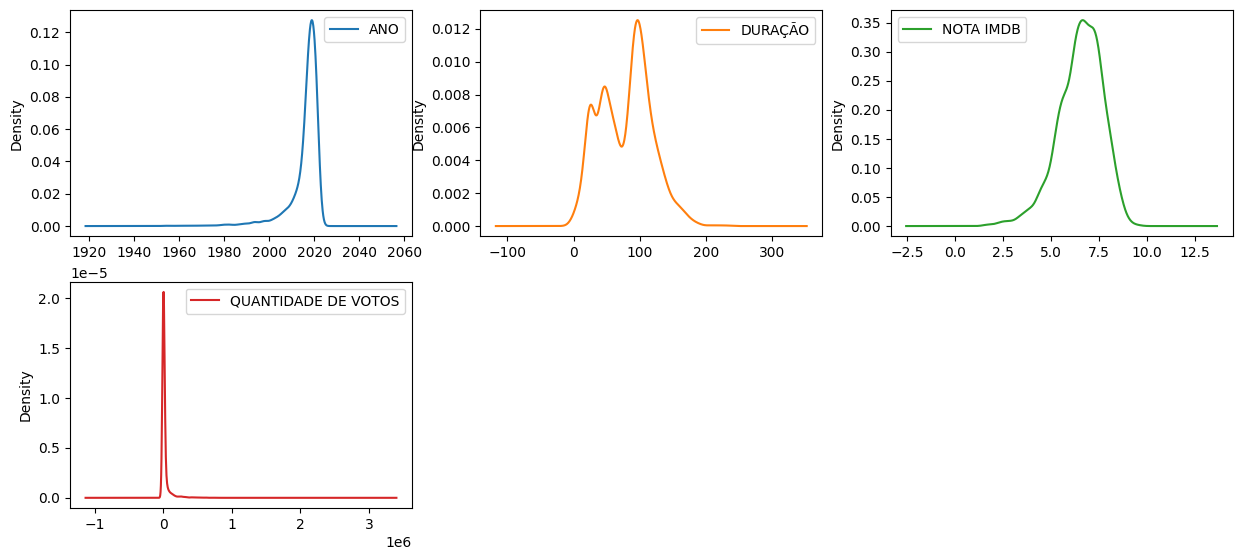

In [59]:
# Density Plot
dataset.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()


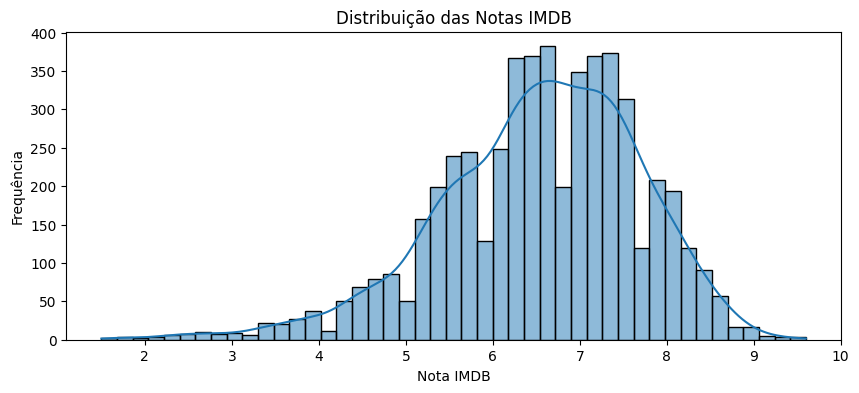

In [61]:
# Set the size of the figure
plt.figure(figsize=(10, 4))  # Adjust the dimensions as needed

# Visualizing distribution of IMDb scores
sns.histplot(dataset['NOTA IMDB'], kde=True)
plt.xlabel('Nota IMDB')
plt.ylabel('Frequência')
plt.title('Distribuição das Notas IMDB')
plt.show()

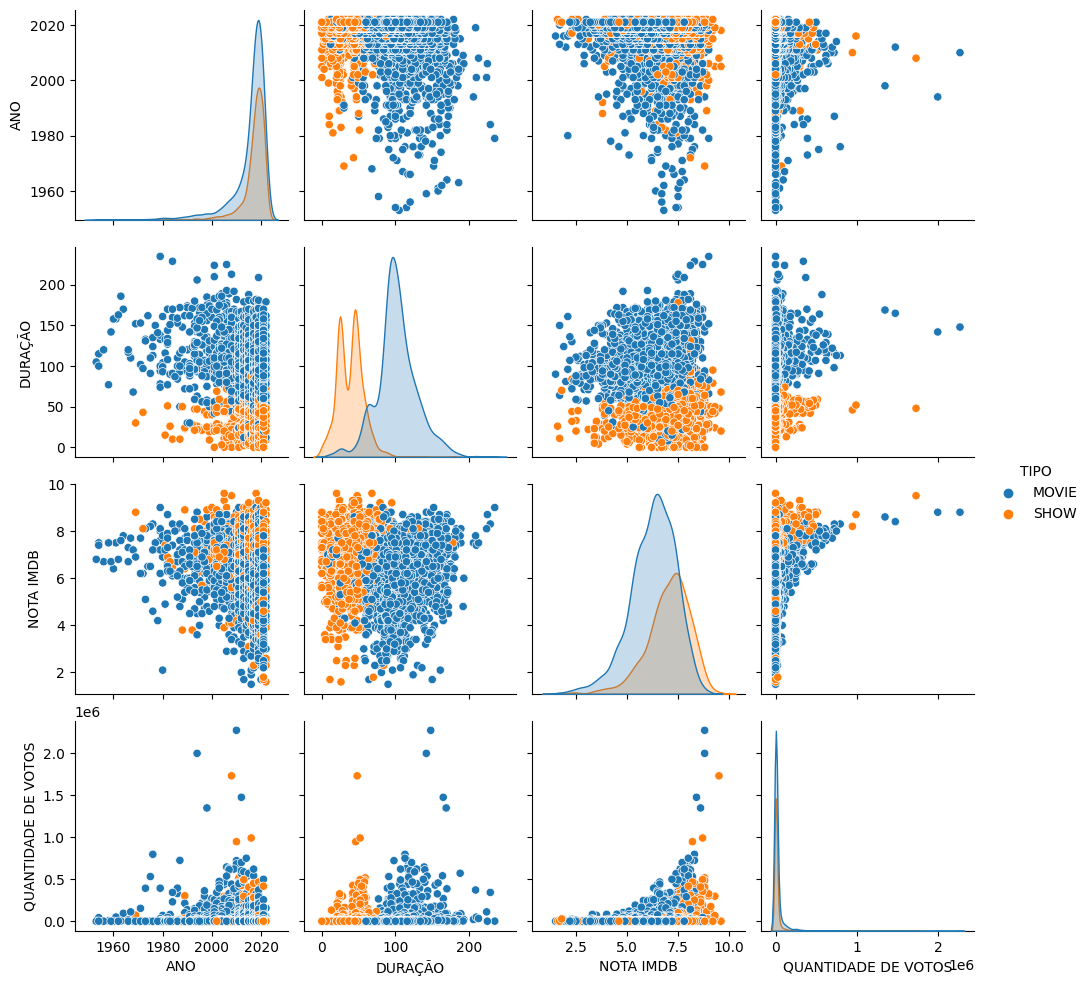

In [62]:
sns.pairplot(data=dataset, hue = "TIPO", height = 2.5);

### **4 - Pré-processamento**

Nesta etapa, realizamos diversas operações de preparação de dados, como tratamento de missings, limpeza dos dados, organização do dados da forma mais coerente para o objetivo,  transformações como one-hot-encoding, seleção de características (feature selection).

####**4.1 - Tratamento de Missings e Limpeza**

Apesar que na fonte em que foi retirado este banco de dados dizer que os missings já foram tratados, é muito importante verificarmos.

In [5]:
# Checando valores faltantes
print(dataset.isnull().sum())

ID                        0
TÍTULO                    0
TIPO                      0
SINOPSE                   5
ANO                       0
CLASSIFICAÇÃO          2285
DURAÇÃO                   0
ID IMDB                   0
NOTA IMDB                 0
QUANTIDADE DE VOTOS      16
dtype: int64


É muito importante salvarmos um NOVO dataset para tratamento de missings.

<Axes: >

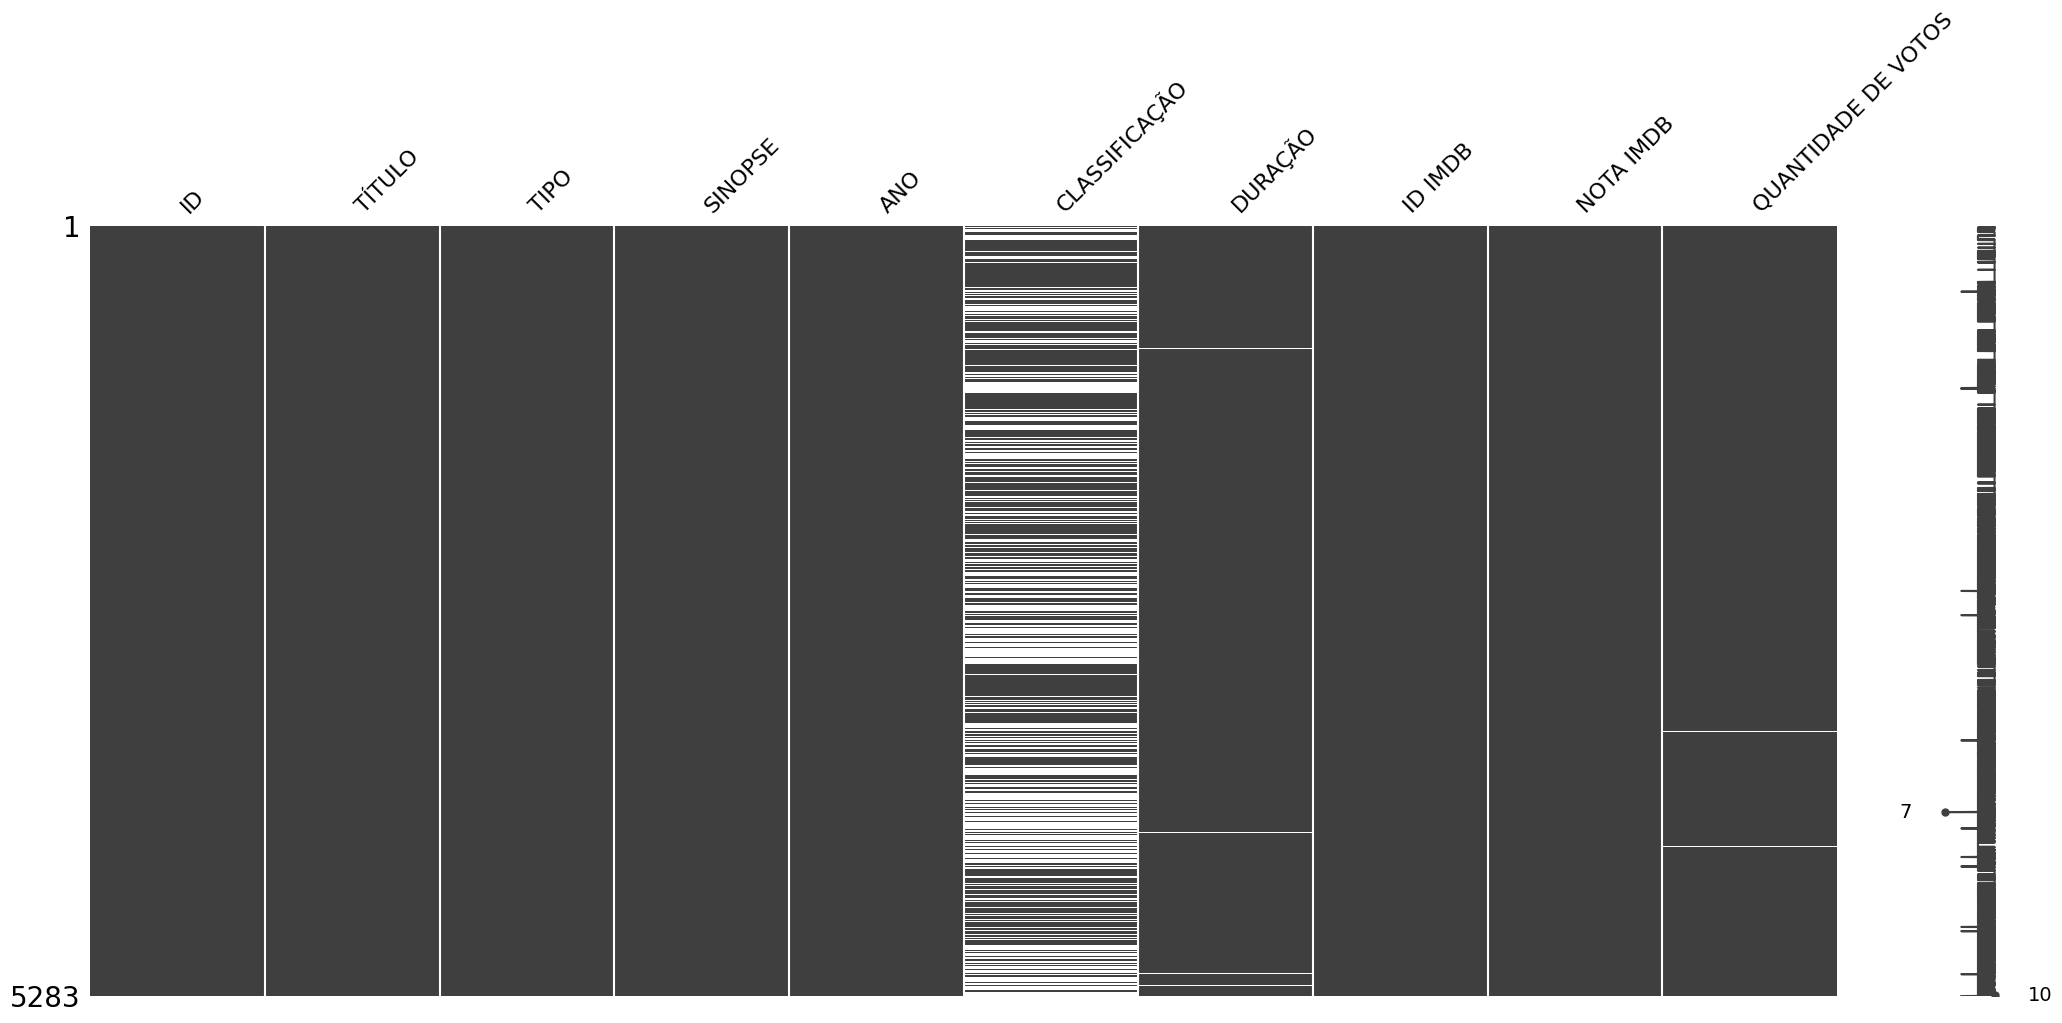

In [15]:
# recuperando os nomes das colunas
col = list(dataset.columns)

# o novo dataset irá conter todas as colunas com exceção da última (classe)
atributos = dataset[col[:]]

# substituindo os zeros por NaN
atributos.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)


Aqui vamos remover a coluna CLASSIFICAÇÃO que está com muitos Nan, pois ela não terá muito utilizadade para o objetivo final.
Queremos ter um código que seja possivel criar um sistema de recomendação de futuros filmes a assistir a partir das notas IMDB já classificadas, e por isso, se torna interessante retirar as colunas SINOPSE e ID.

<Axes: >

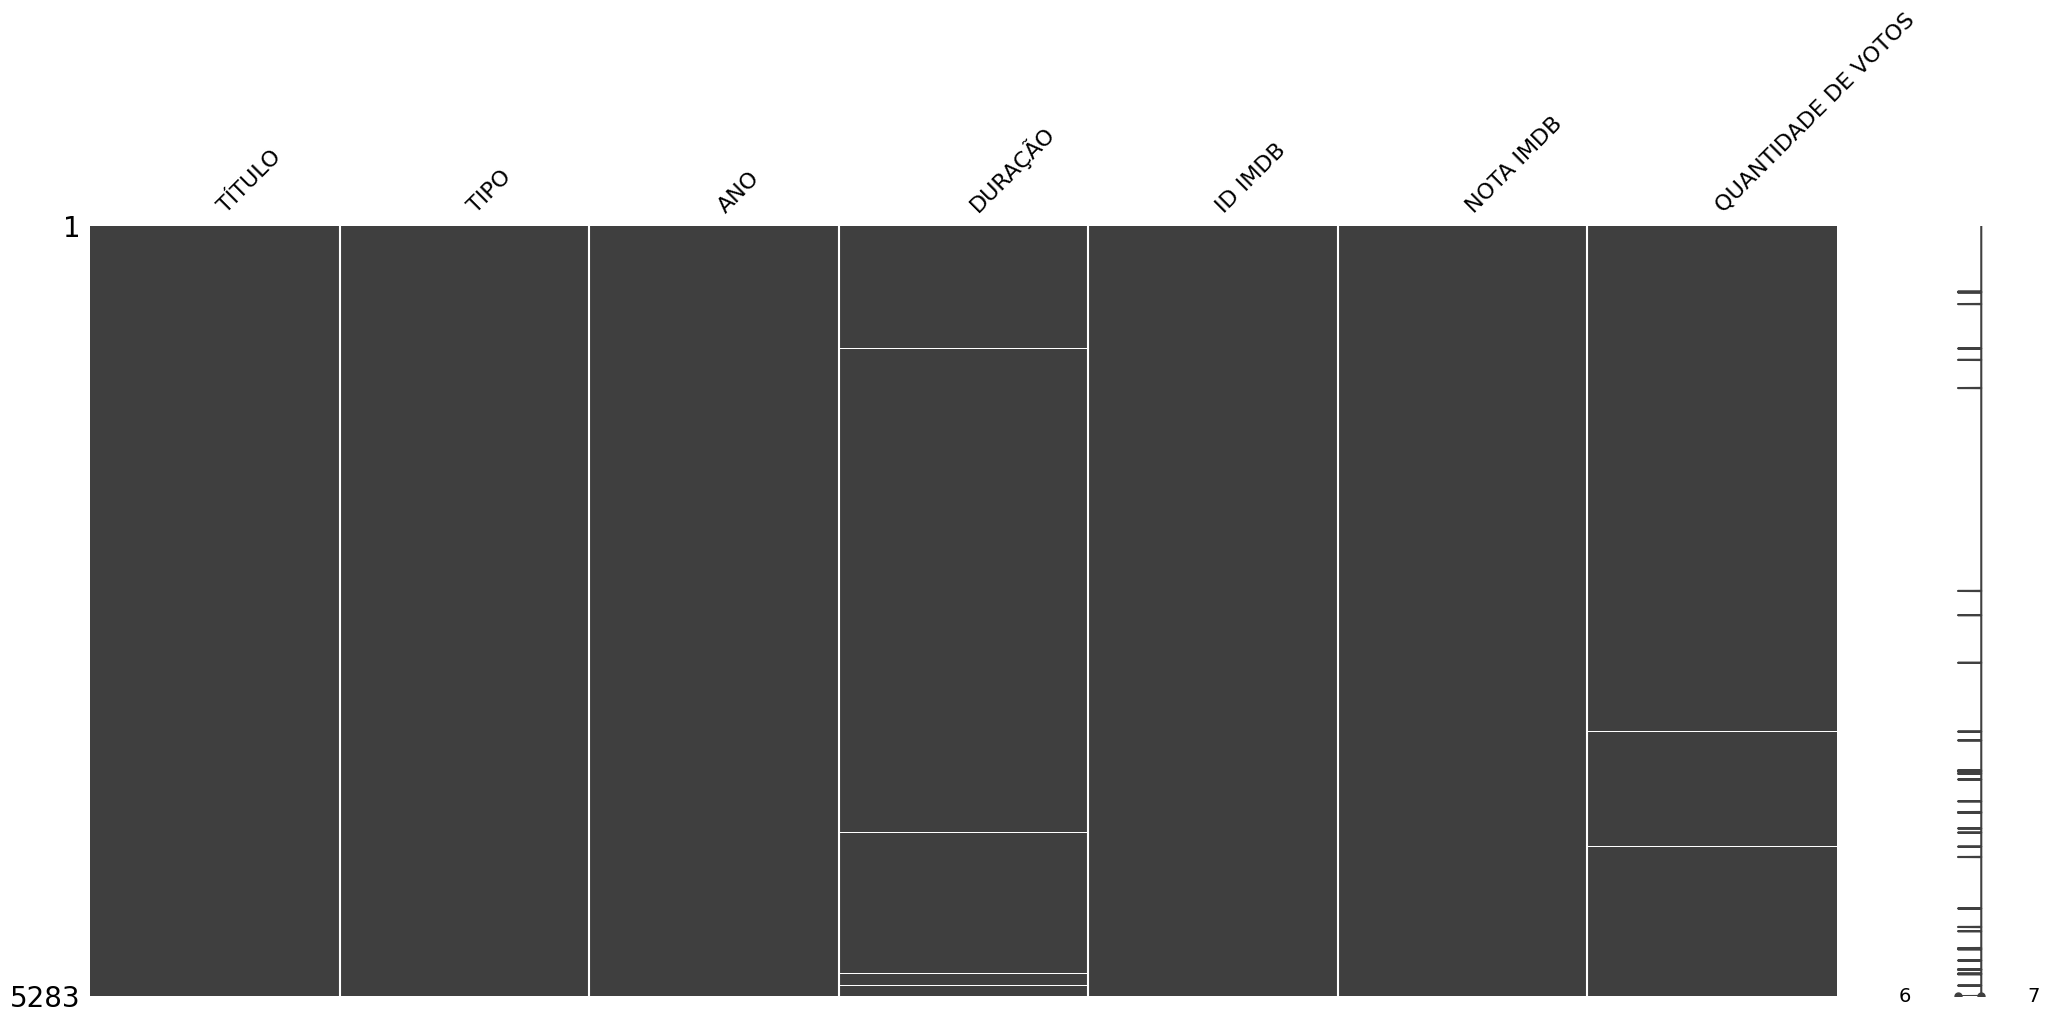

In [11]:
atributos.drop(['CLASSIFICAÇÃO', 'SINOPSE', 'ID'], axis=1, inplace= True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

Substituindo os NaN de 'DURAÇÃO'  'QUANTIDADE DE VOTOS' pela mediana da coluna

<Axes: >

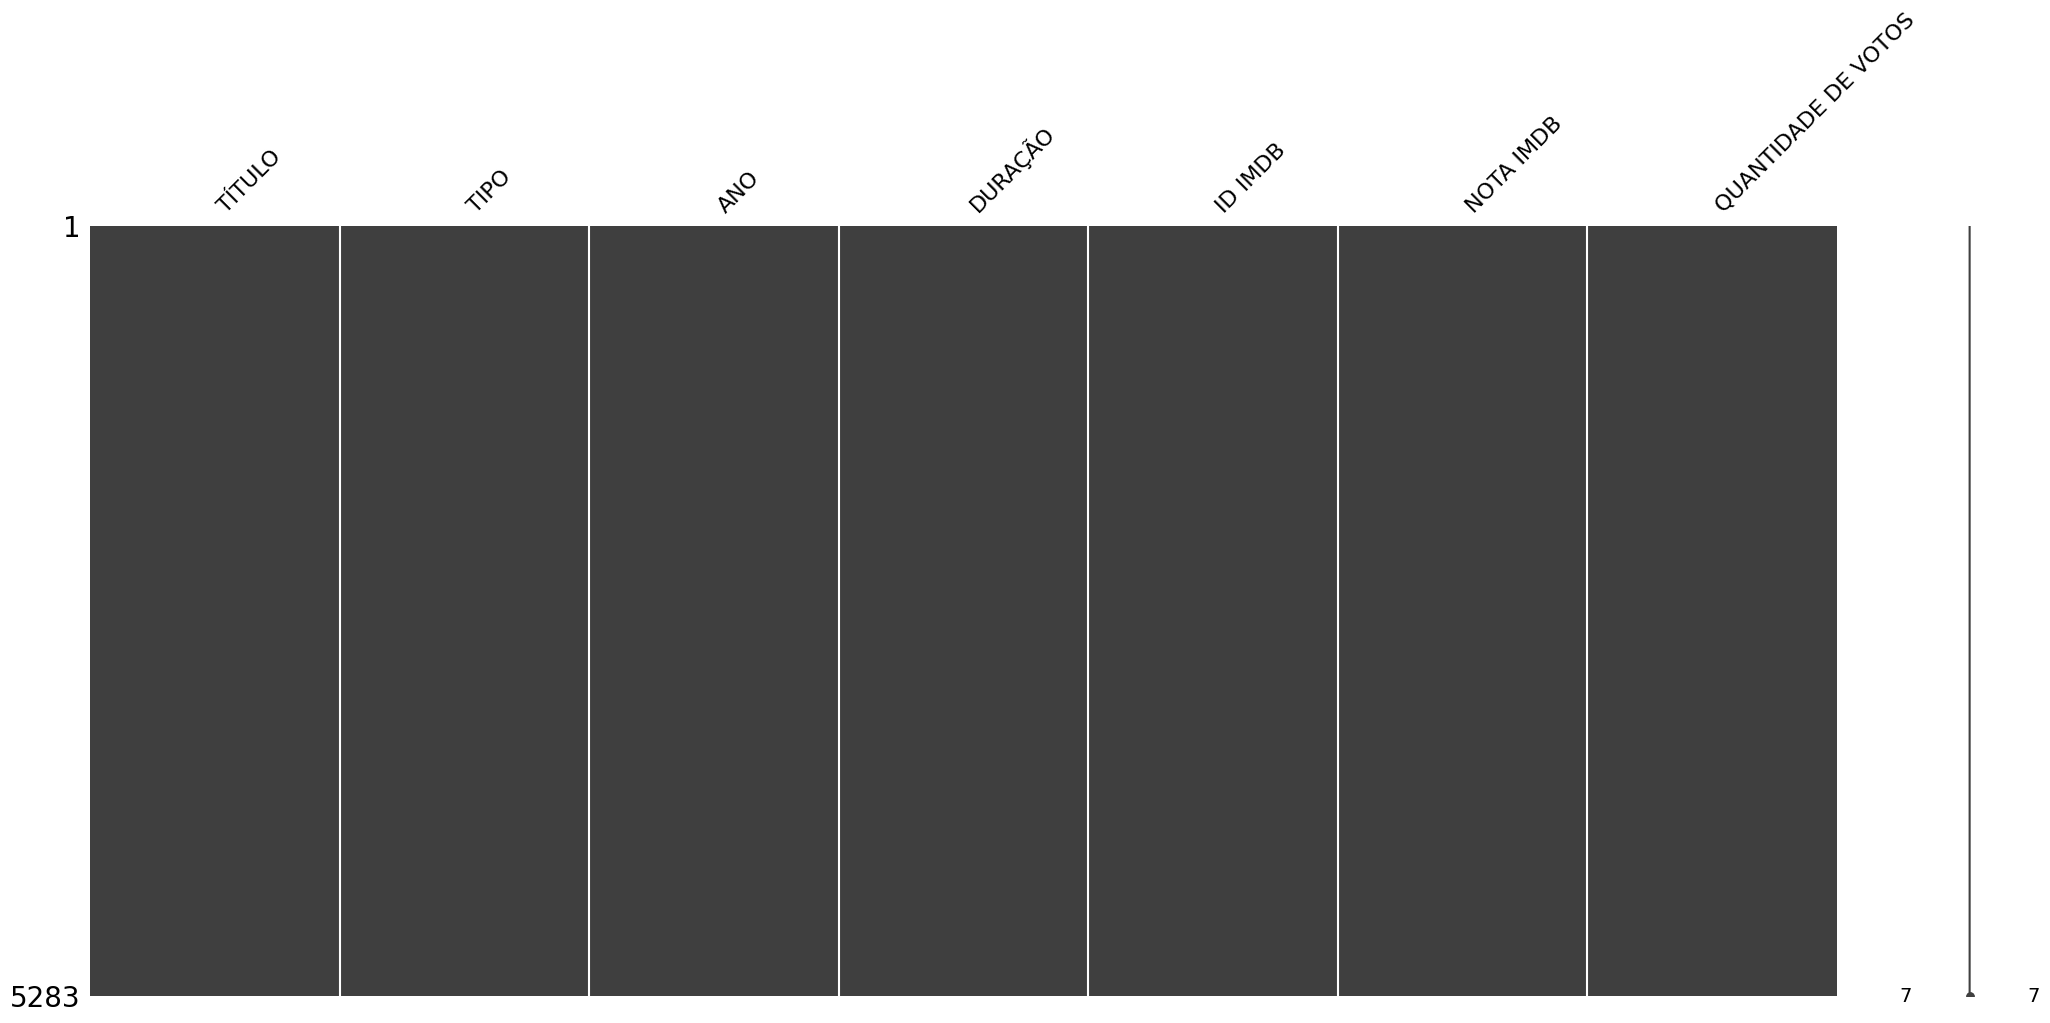

In [12]:
atributos['DURAÇÃO'].fillna(atributos['DURAÇÃO'].median(), inplace=True)
atributos['QUANTIDADE DE VOTOS'].fillna(atributos['QUANTIDADE DE VOTOS'].median(), inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

In [65]:
dataset["CLASSIFICAÇÃO"] = dataset["CLASSIFICAÇÃO"].fillna(method='ffill')
dataset["QUANTIDADE DE VOTOS"] = dataset["QUANTIDADE DE VOTOS"].fillna(method='ffill')

Guardando o novo dataset para testes futuros.

In [13]:
datasetSemMissings = atributos

# exibindo as primeiras linhas
datasetSemMissings.head()

,TÍTULO,TIPO,ANO,DURAÇÃO,ID IMDB,NOTA IMDB,QUANTIDADE DE VOTOS
0,Taxi Driver,MOVIE,1976,113.0,tt0075314,8.3,795222.0
1,Monty Python and the Holy Grail,MOVIE,1975,91.0,tt0071853,8.2,530877.0
2,Life of Brian,MOVIE,1979,94.0,tt0079470,8.0,392419.0
3,The Exorcist,MOVIE,1973,133.0,tt0070047,8.1,391942.0
4,Monty Python's Flying Circus,SHOW,1969,30.0,tt0063929,8.8,72895.0


####**4.2. Separação em conjunto de treino e conjunto de teste**

É uma boa prática usar um conjunto de teste (na literatura também chamado de conjunto de validação). Este conjunto é amostra dos dados que não será usada para a construção do modelo, mas somente no fim do projeto para confirmar a precisão do modelo final. É um teste que podemos usar para verificar o quão boa foi a construção do modelo, e para nos dar uma ideia de como o modelo irá performar nas estimativas em dados não vistos.

Usaremos 80% do conjunto de dados para modelagem e guardaremos 20% para teste, usando a estratégia train-test-split.

Primeiramente, iremos sinalizar quais são as colunas de atributos (X - 0 a ) e qual é a coluna das classes (Y - 8). Em seguida, especificaremos o tamanho do conjunto de teste desejado e uma semente (para garantir a reprodutibilidade dos resultados). Finalmente, faremos a separação dos conjuntos de treino e teste através do comando train_test_split, que retornará 4 estruturas de dados: os atributos e classes para o conjunto de teste e os atributos e classes para o conjunto de treino.

Aqui vamos configurar como o conjunto de classes o atributo de nota IMDB.

In [21]:
test_size = 0.20
seed = 7

# Separação em conjuntos de treino e teste (dataset original)
array = dataset.values
X = array[:,0:7]
y = array[:,8]
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed)


### **5 - Conclusão**

Foi escolhido realizar uma separação dos dados com conjuntos de treino e teste, sem estratificação, com conjunto de 80% para treino e 20% para teste. A escolha da estratificação foi devido a necessidade de ter um número mínimo de 2 grupos para qualquer classe.

Nas nossas visualizações percebi que temos muitos mais títulos de filmes que séries, e que a classificação mais geral dos títulos existentes é de nota mediana, não constando nenhuma filme fantástico com nota 10, e que filmes muito longos tendem a ser bem classificados.